In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [153]:
df = pd.read_csv('ParisHousing.csv')

Data Review

In [154]:
# if arg not given, default is showing 5 rows
df.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1


In [155]:
# use .shpae to get the numbers of rows and columns 
df.shape

(10000, 17)

In [156]:
# To check the colomn names
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [157]:
# we can get the data types here, if to get data type only: df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [158]:
# To get the basic statistic data description for numerical data (all in this case)
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [159]:
# Check and see if there's any null or na, if yes we need to deal with them like replace with mean or use other tech
# check if there's any null values
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [160]:
# check if theres any na values
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

Data Analysis and visualization

Text(0, 0.5, 'Frequency')

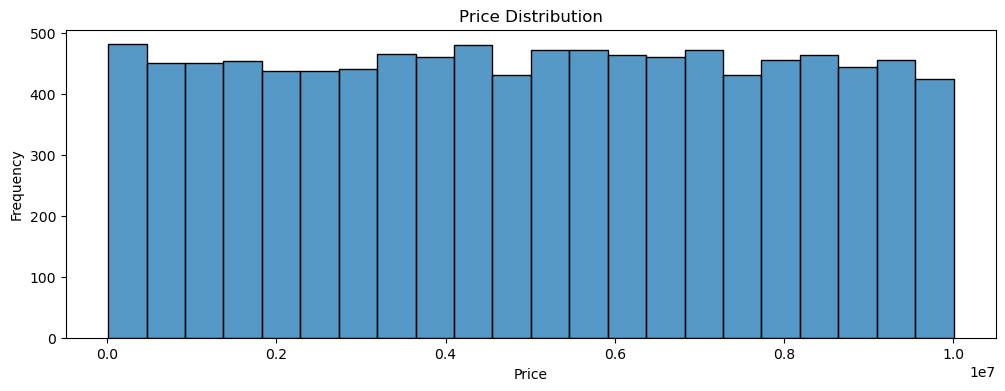

In [161]:
sns.histplot(df['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [162]:
# get the correlation map and see their relationships
df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


<Axes: >

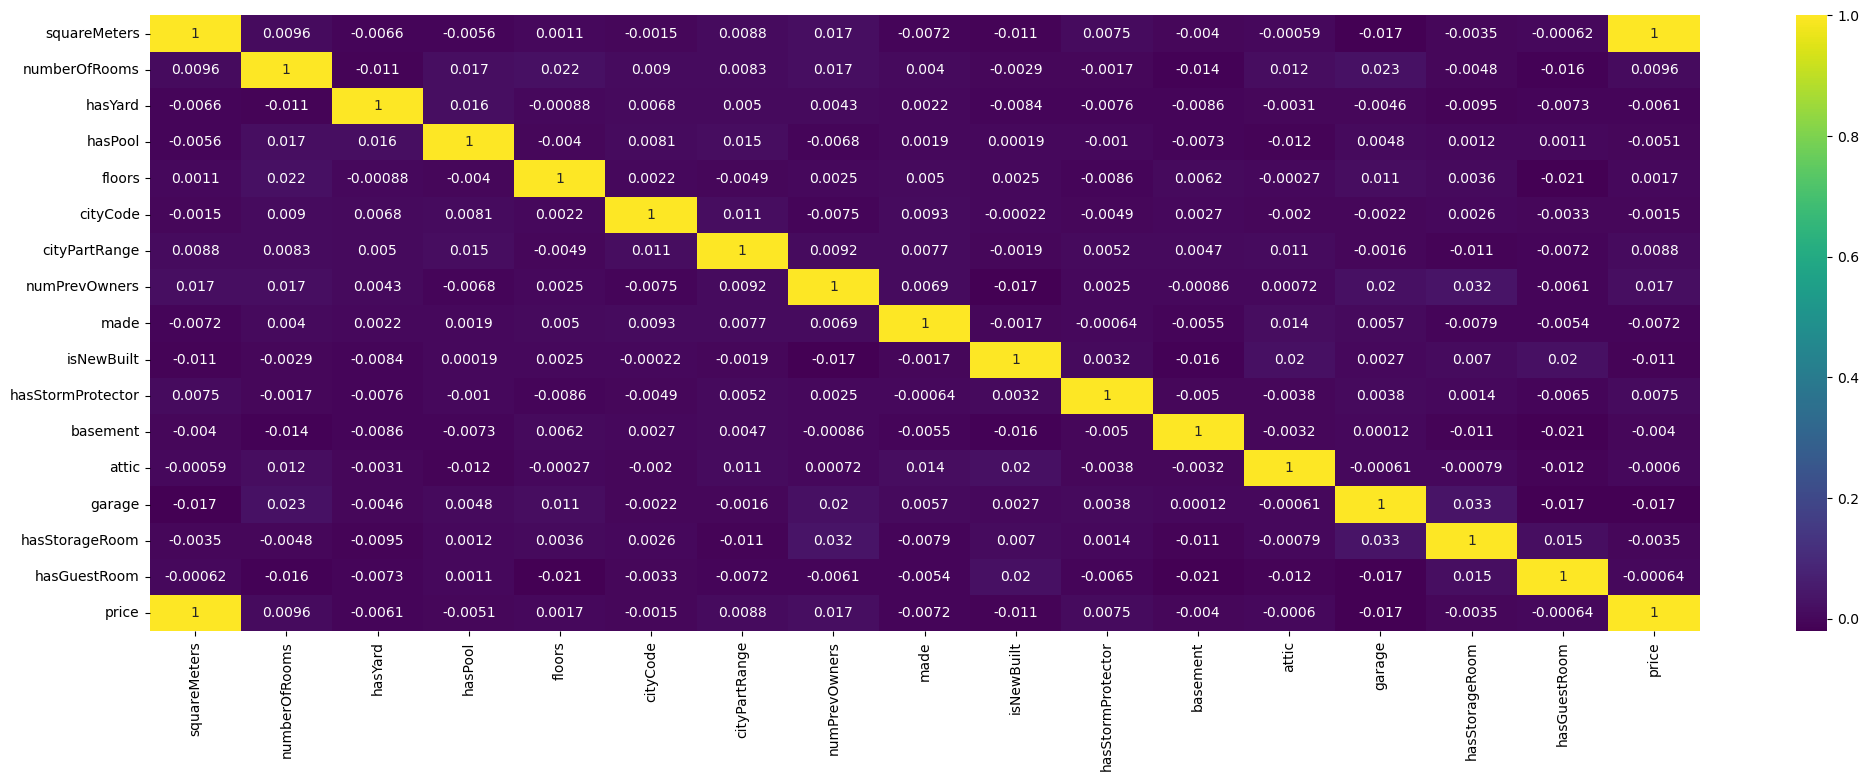

In [163]:
# To have a better view, we set the figure size and use heatmap. Yellow means highly related, purple means no relaship
plt.figure(figsize=(25, 8))
sns.heatmap(df.corr(),annot=True,  cmap='viridis')
# We can see in the paris housing price data, price is only highly related with area (square meters)

In [164]:
# Because only sqm is highly related to price, we will run two models and compare: one is full model, one is price-squremeters.
# full model
y = df.iloc[:,-1]
X = df.iloc[:, :-1]

In [165]:
# Split data into training and test with 70:30 with random state = 100, if you want to see the same result as mine, use 100 too
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [166]:
print(f"coefficient of determination: {model.fit(X,y).score(X, y):.7f}")
print(model.coef_)
print(model.intercept_)
# formula should be: y = 7728.63+9.999x1 + 0.017x2 + ... -9.2x16

coefficient of determination: 0.9999996
[ 1.00000024e+02  2.51844810e-01  3.01229551e+03  2.97713775e+03
  5.45420542e+01 -8.03888243e-04  4.73685001e+01 -3.95730186e-01
 -2.31311931e+00  1.58041540e+02  1.41196130e+02 -2.10562533e-03
 -4.50939065e-03  1.13432814e-01  1.94856126e+01 -5.62033751e+00]
4926.758592898957


In [167]:
y_pred = model.predict(X_test)

In [168]:
# these will be our predicted prices with the test data
y_pred

array([1459613.78906108, 4480951.55348934, 9137337.88254215, ...,
       6407145.60151565, 1316776.65094791,  575314.81422137])

In [169]:
y_test

8018    1459601.3
9225    4479097.8
3854    9138828.0
2029    5006544.0
3539    8520917.7
          ...    
4208    6236152.9
5335      63977.0
2554    6407296.5
13      1320803.4
4468     576081.8
Name: price, Length: 3000, dtype: float64

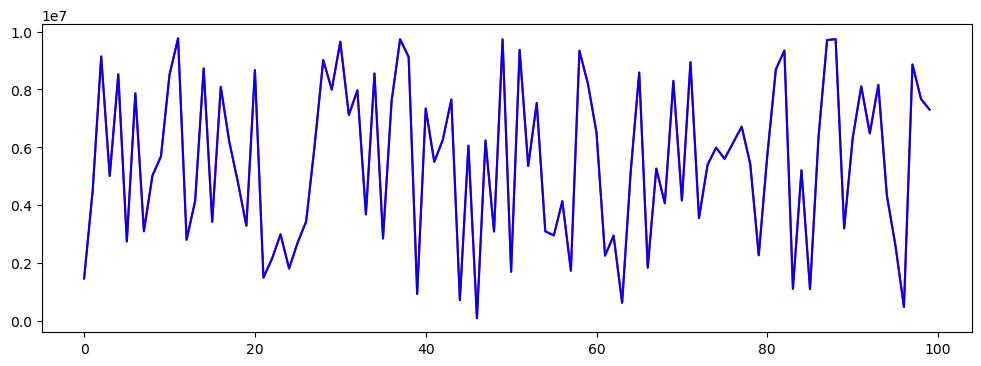

In [170]:
# visually comparision
x = np.arange(100)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred[:100], c = "red")
plt.plot(x, y_test[:100], c = "blue")
plt.show()

# the unit is 1e7,looks like they blue covered red completely, but we can see from above there is slightly difference between actual and pred

In [184]:
print(f"The average of the housing price is: {int(np.mean(y_test))}.")
RMSE = mean_squared_error(y_test, y_pred)**.5
print(f"The root mean squared errors is: {int(RMSE)}")

The average of the housing price is: 4951703.
The root mean squared errors is: 1921


In [185]:
# price - squaremeters
X1 = df.iloc[:, 0:1]

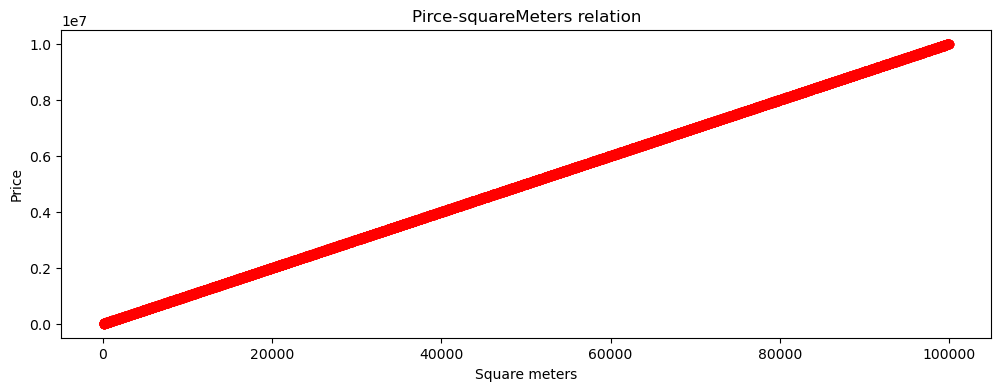

In [186]:
plt.scatter(X1,y,color='red')
plt.title('Pirce-squareMeters relation')
plt.xlabel('Square meters')
plt.ylabel('Price')
plt.show()

In [187]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 100)

model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [189]:
print(f"coefficient of determination: {model.fit(X1,y).score(X1, y):.7f}")
print(model.coef_)
print(model.intercept_)

# formula: y = 6460.88 + 99.999x

coefficient of determination: 0.9999987
[99.99946914]
6460.879667329602


In [190]:
y_pred = model.predict(X1_test)

In [191]:
y_pred

array([1465253.13552275, 4481437.12380842, 9135112.41930773, ...,
       6404126.91701738, 1315153.93233938,  575757.85749739])

In [194]:
print(f"The average of the housing price is: {int(np.mean(y_test))}.")
RMSE = mean_squared_error(y_test, y_pred)**.5
print(f"The root mean squared errors is: {int(RMSE)}")

The average of the housing price is: 4951703.
The root mean squared errors is: 3269


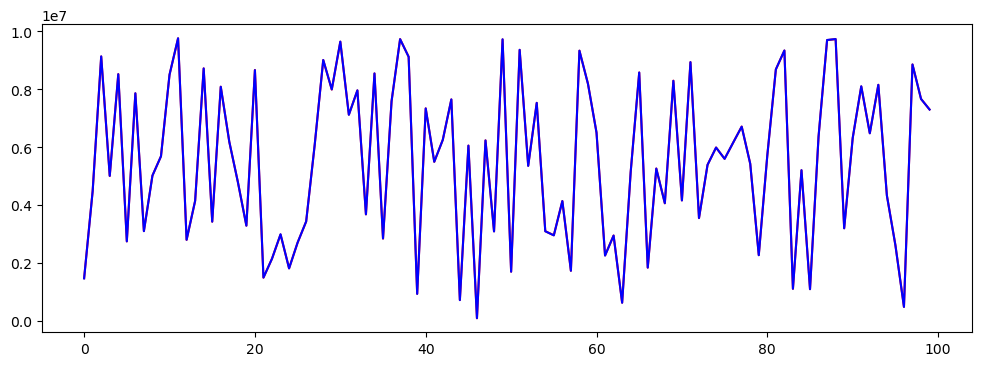

In [195]:
# visually comparision
x = np.arange(100)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred[:100], c = "red")
plt.plot(x, y_test[:100], c = "blue")
plt.show()